In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


# 1. Data Analysis

In [5]:
# Load dataset
url = 'https://raw.githubusercontent.com/Calvin993/WIA1006/tree/main/Lab2/House%20Pricing.csv'
df = pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found

In [10]:
# display first few rows of data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
# display last few rows of data
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [12]:
# Get number of rows and columns
num_rows, num_cols = df.shape

# Print number of records, rows and columns
print('Number of records in total:', num_rows)
print('Number of rows:', num_rows)
print('Number of columns:', num_cols)
     

Number of records in total: 545
Number of rows: 545
Number of columns: 13


In [13]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
# Get number of unique values in each column
n = df.nunique(axis = 0)
print('Number of unique values in each column:\n', n)

Number of unique values in each column:
 price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


In [15]:
# check data types of columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [16]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
# List out all the variety of values in each column
for col in df.columns:
    print('{}\n'.format(col))
    print(df[col].unique())

price

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  490000

In [18]:
# get summary statistics of numerical columns
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

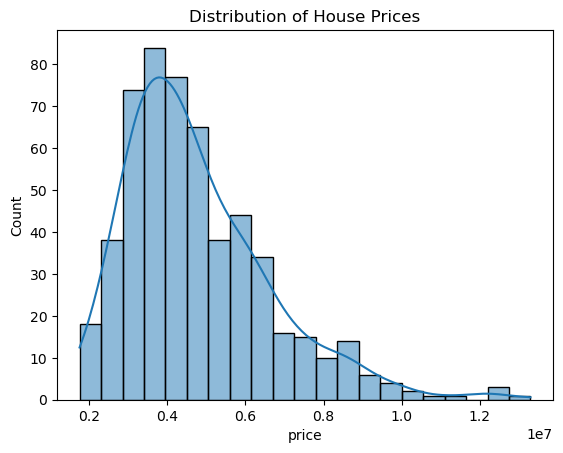

In [20]:
# Plotting the distribution of the target variable 'price'
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

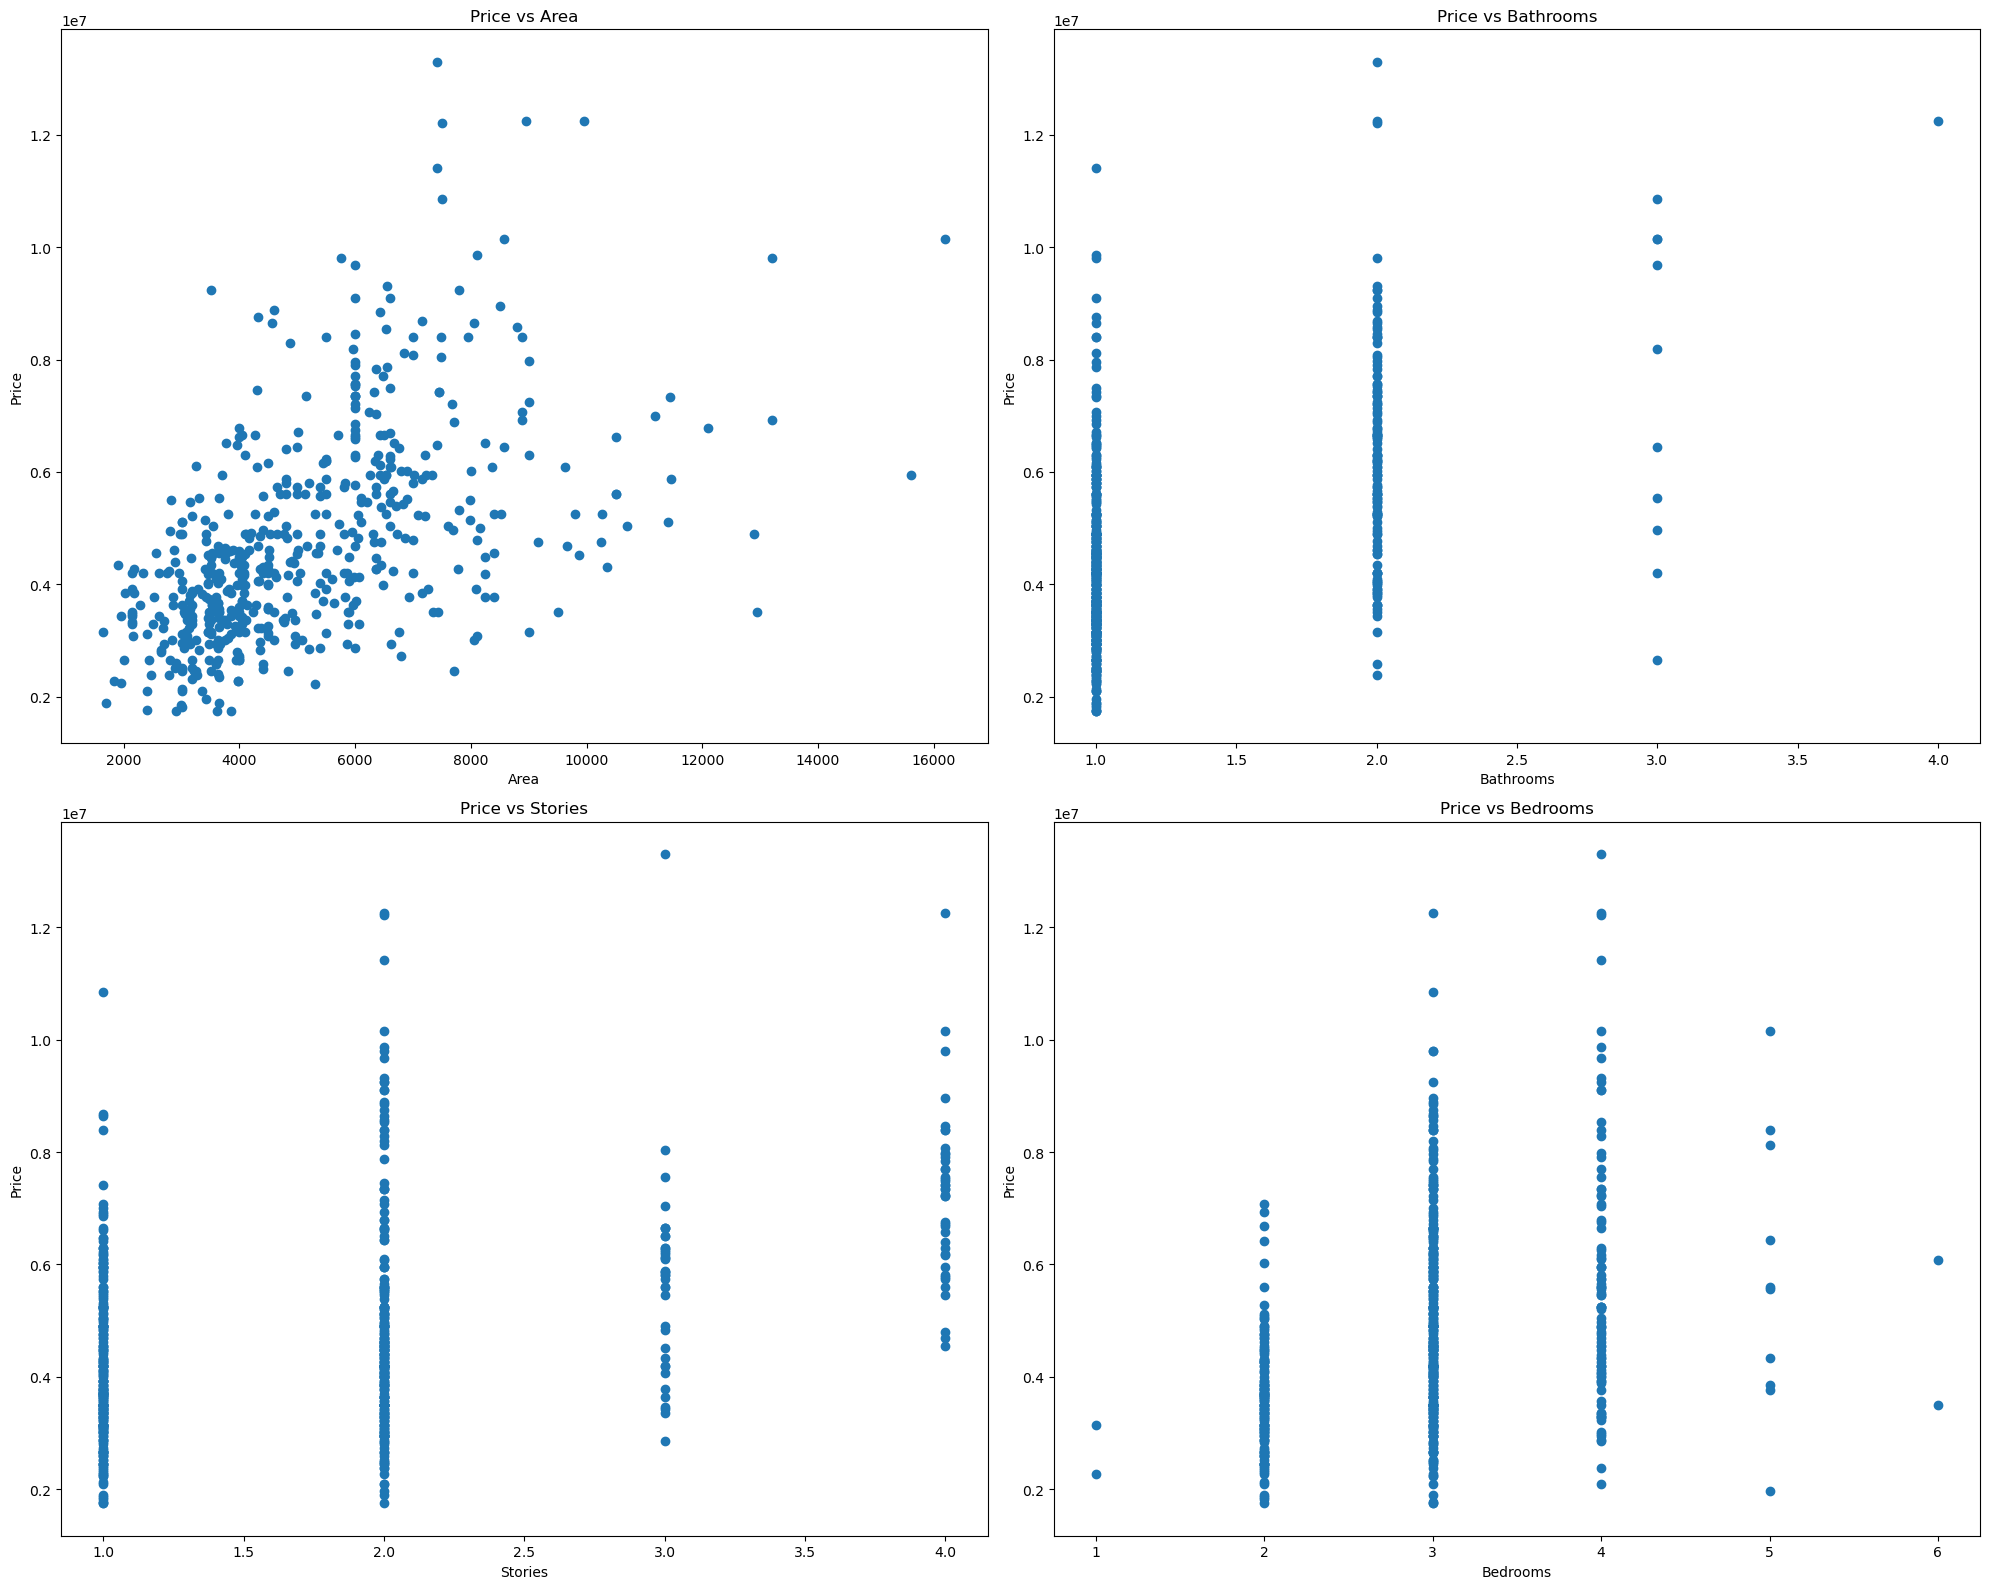

In [21]:
plt.figure(figsize=(20, 16))

plt.subplot(2,2,1)
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')

plt.subplot(2,2,2)
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')

plt.subplot(2,2,3)
plt.scatter(df['stories'], df['price'])
plt.xlabel('Stories')
plt.ylabel('Price')
plt.title('Price vs Stories')

plt.subplot(2,2,4)
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')

plt.tight_layout()
plt.show()


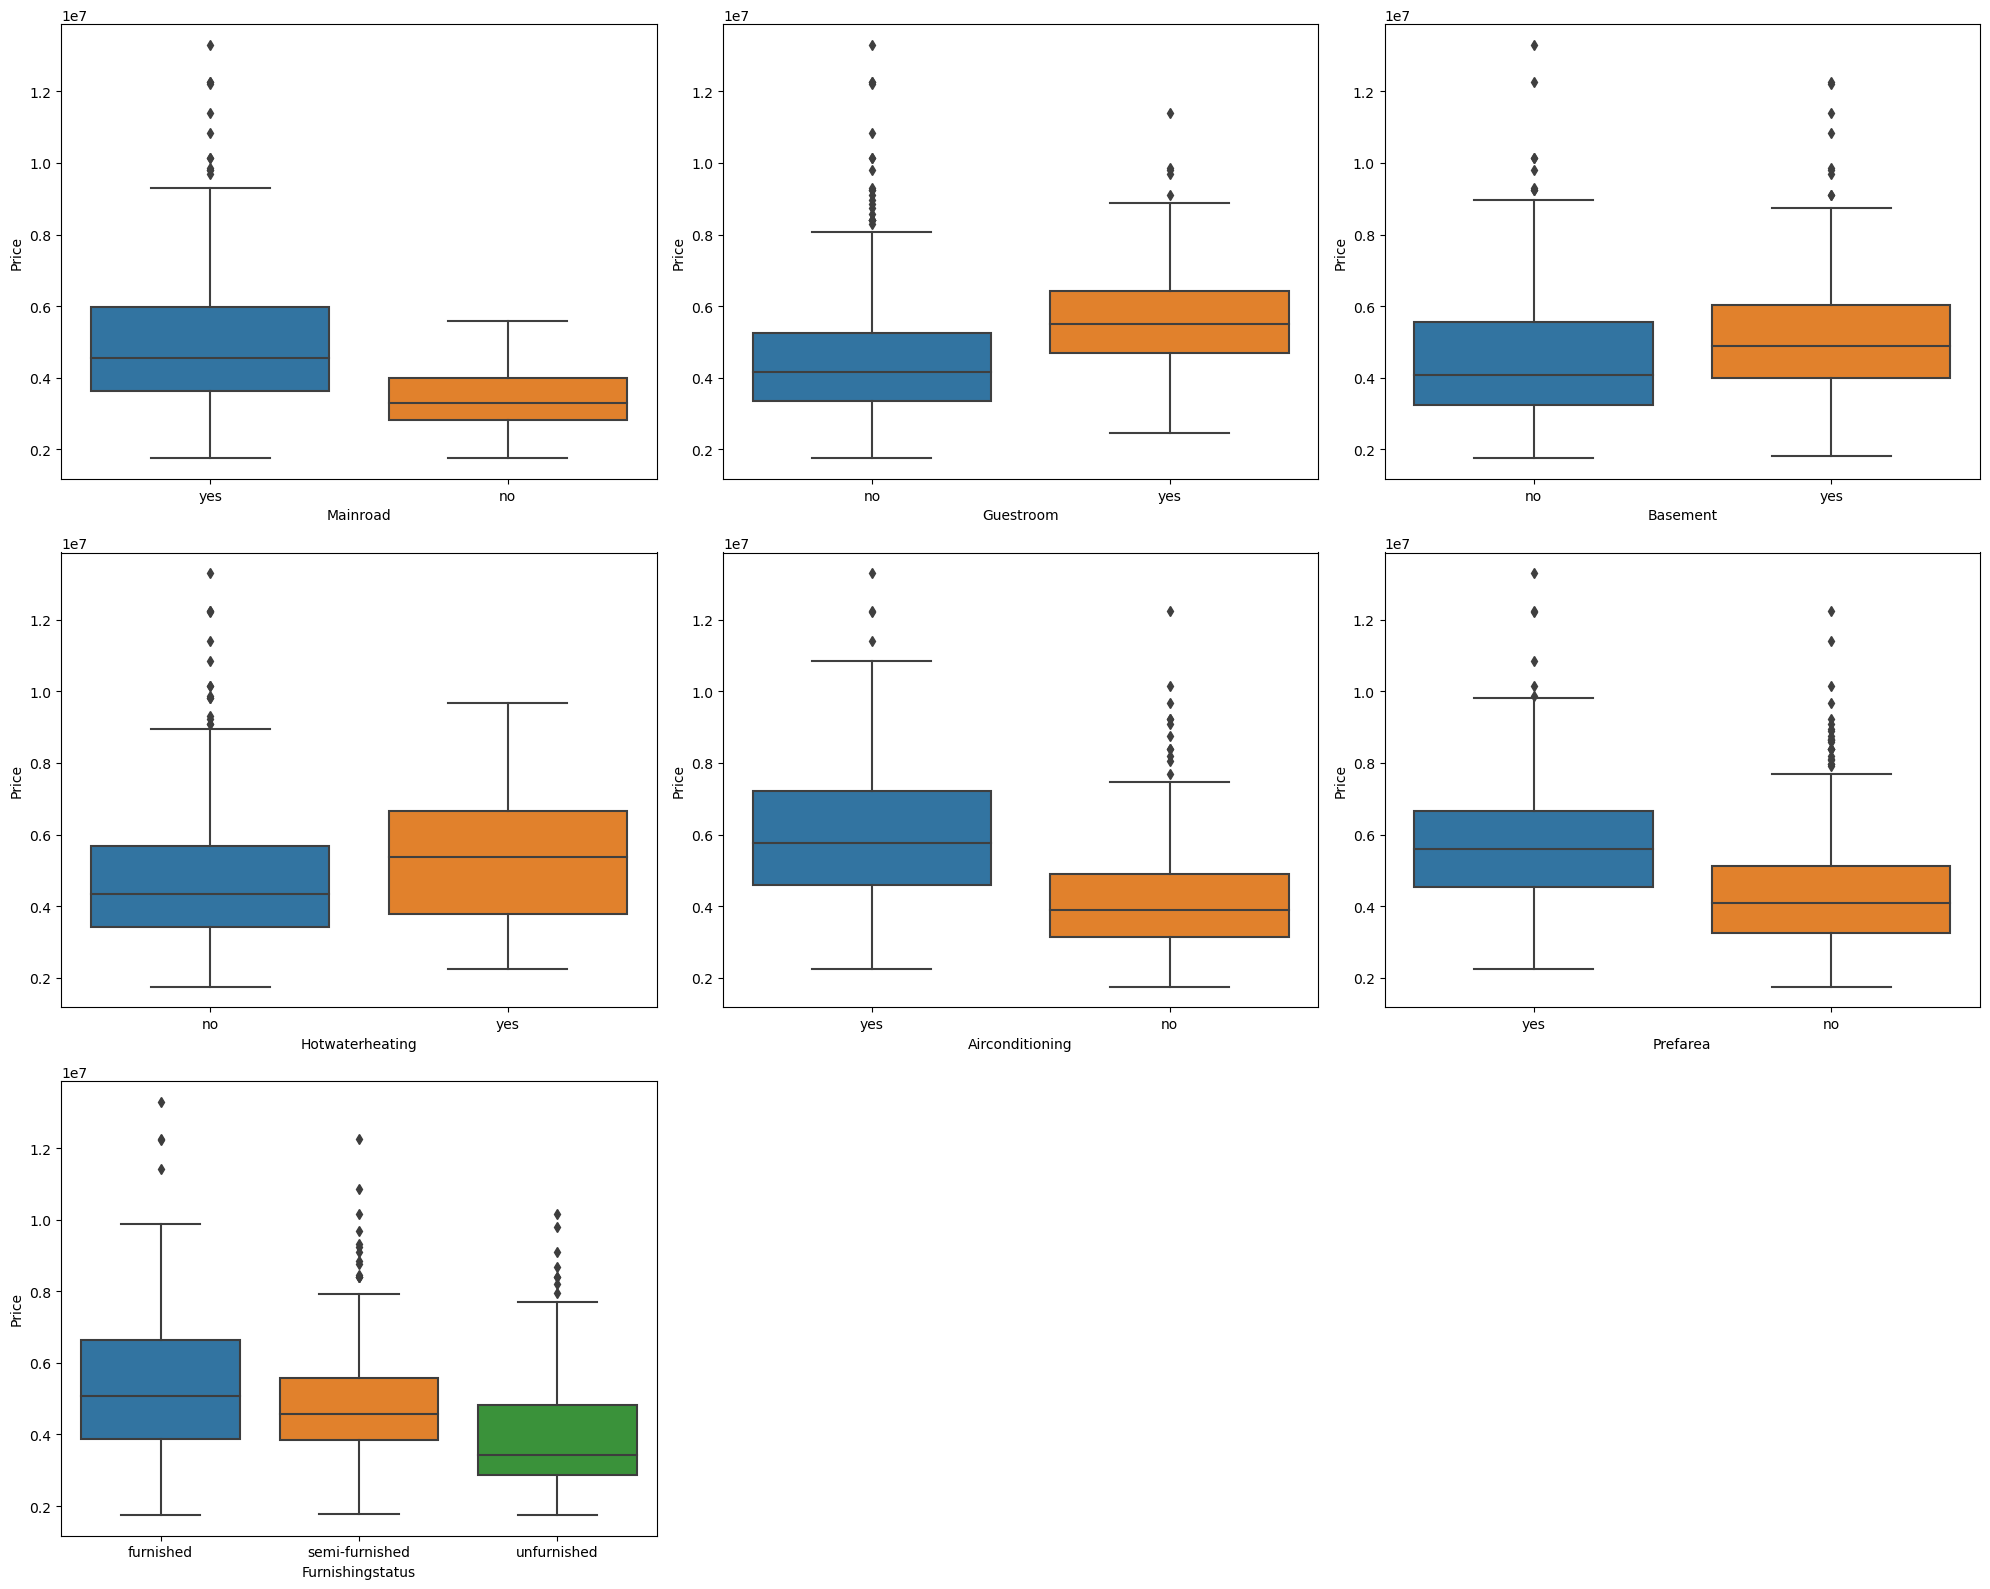

In [22]:
# Plotting the boxplot of the target variable 'price' for each categorical feature
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(20, 16))
for i, cat_feature in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=cat_feature, y='price', data=df)
    plt.xlabel(cat_feature.capitalize())
    plt.ylabel('Price')
    plt.tight_layout()
plt.show()


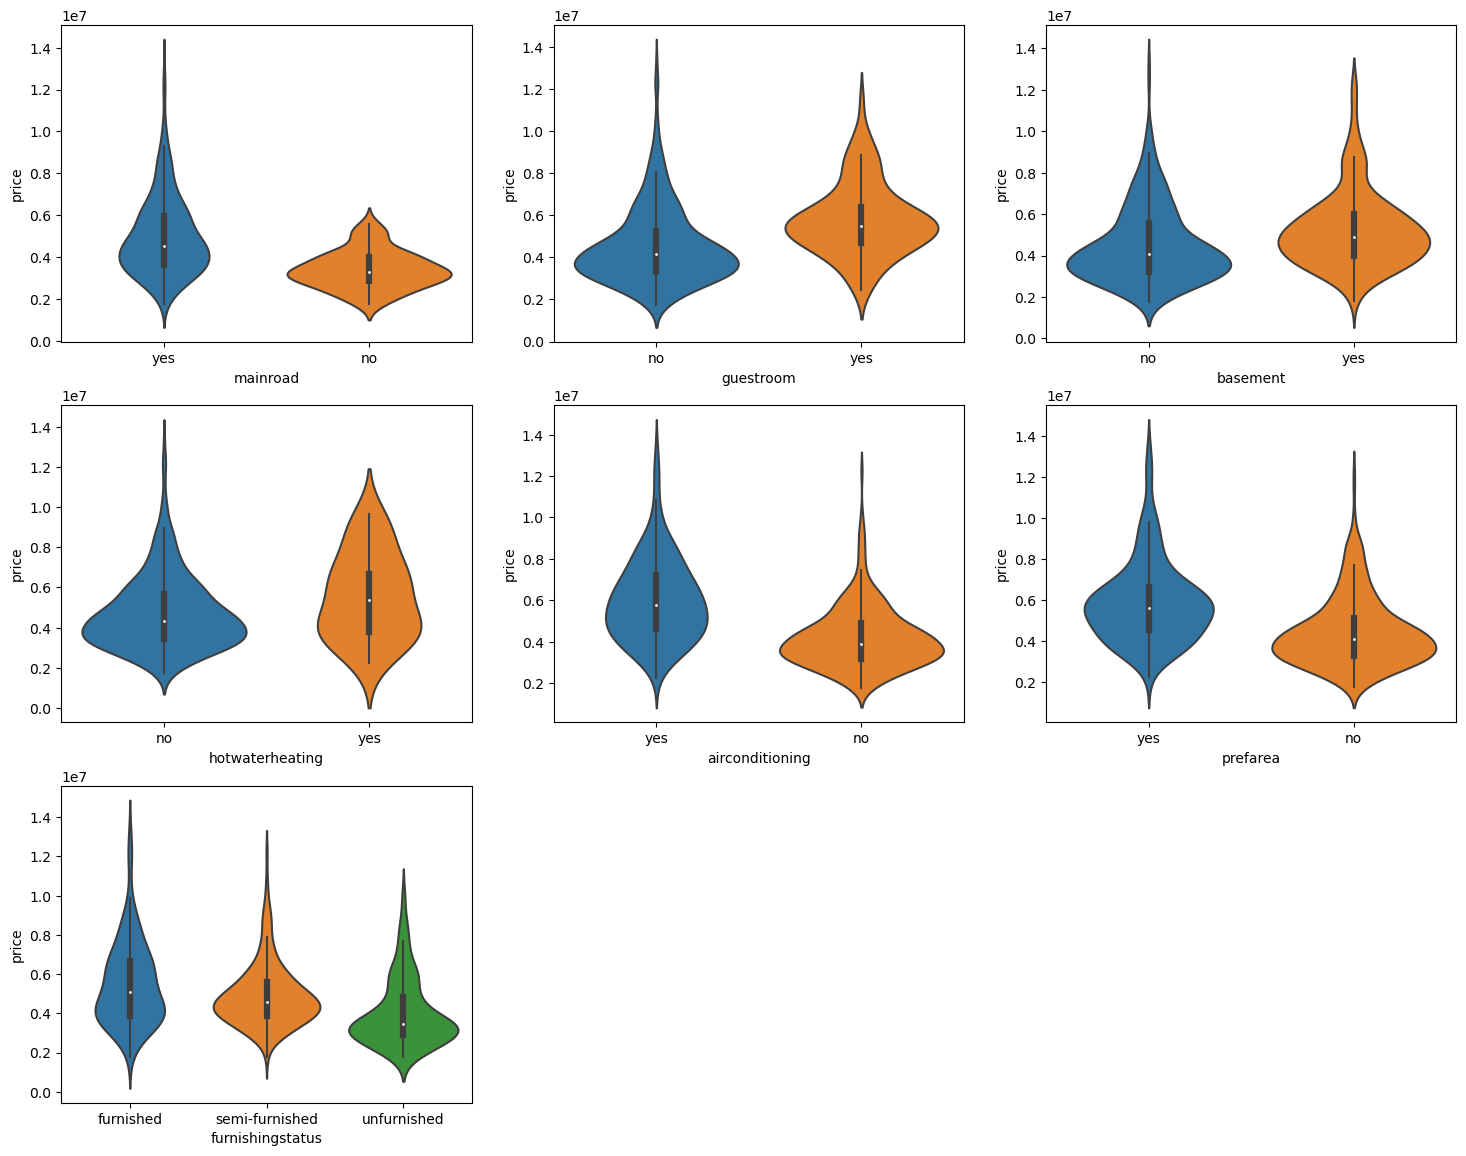

In [23]:
plt.figure(figsize = (18, 14))
plt.subplot(3,3,1)
sns.violinplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(3,3,2)
sns.violinplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(3,3,3)
sns.violinplot(x = 'basement', y = 'price', data = df)
plt.subplot(3,3,4)
sns.violinplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(3,3,5)
sns.violinplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(3,3,6)
sns.violinplot(x = 'prefarea', y = 'price', data = df)
plt.subplot(3,3,7)
sns.violinplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

# 2. Data Preprocessing

In [24]:
# import dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# Checking for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [26]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the number of duplicate rows
print(duplicate_rows.sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

0


In [27]:
# Handle categorical variables
# List of features/variables to map
var =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the df list
df[var] = df[var].apply(binary_map)


df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [28]:
# Creating dummy variables for remaining categorical variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [29]:
# Handling data skewed to the right: Natural Log transformation
df['price'] = np.log(df['price'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,0,0


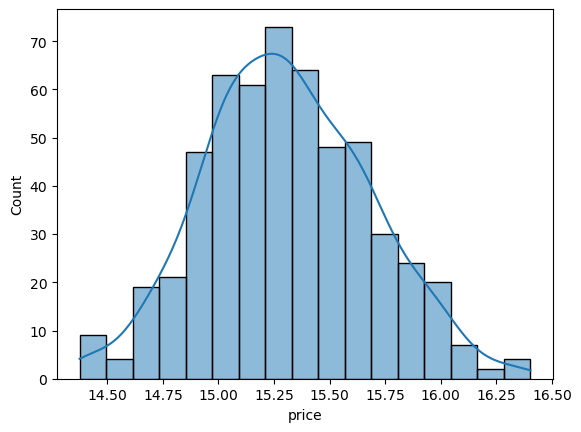

In [30]:
# Histogram of target variable
sns.histplot(df['price'], kde=True)
plt.show()

In [31]:
#scaling/normalizing the numerical features

scaler = StandardScaler()
num_features = ['area','price']
df[num_features] = scaler.fit_transform(df[num_features])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.948408,1.046726,4,2,3,1,0,0,0,1,2,1,0,0
1,2.727233,1.757010,4,4,4,1,0,0,0,1,3,0,0,0
2,2.727233,2.218232,3,2,2,1,0,1,0,0,2,1,1,0
3,2.719538,1.083624,4,2,2,1,0,1,0,1,3,1,0,0
4,2.536186,1.046726,4,1,2,1,1,1,0,1,2,0,0,0


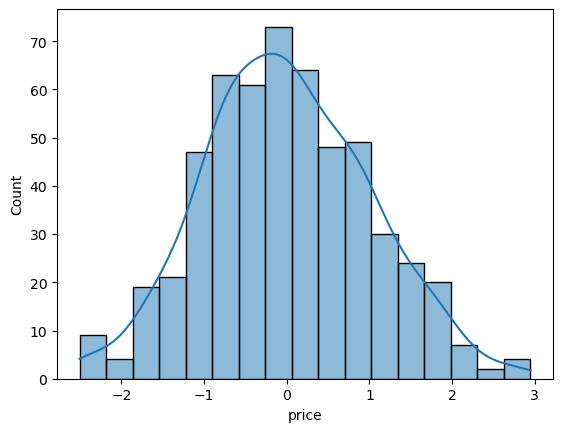

In [32]:
# Histogram of target variable after scaling
sns.histplot(df['price'], kde=True)
plt.show()

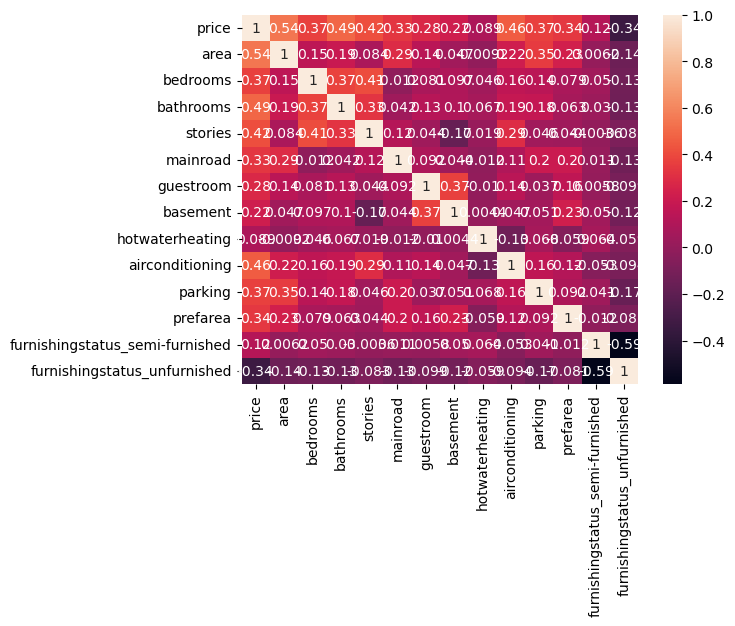

In [33]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

#Split dataset into training and testing sets
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)
     

In [35]:
#Display size of split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (381, 13)
X_test shape: (164, 13)
y_train shape: (381,)
y_test shape: (164,)


# 3. Regression Model Development and Evaluation

# Linear Regression

In [36]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics


In [55]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# Calculate evaluation metrics
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [57]:
# Print the evaluation metrics
print("Linear Regression")
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print('R-squared score:', r2_lr)
print('Root Mean Squared Error:', rmse_lr)

Linear Regression
Mean Absolute Error (MAE): 0.5127477755125702
Mean Squared Error (MSE): 0.4274013432068814
R-squared score: 0.6593694138932602
Root Mean Squared Error: 0.6537593924425724


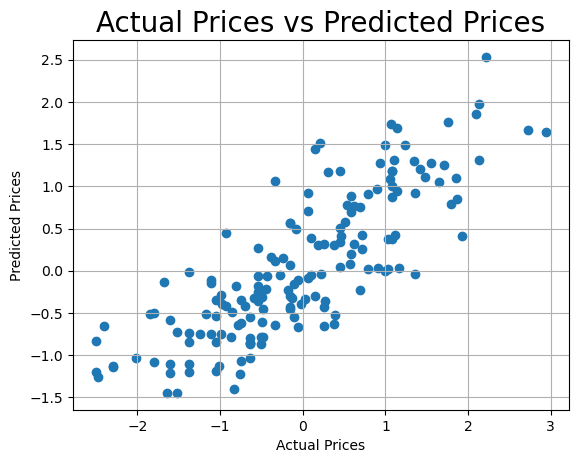

In [58]:
fig = plt.figure()
plt.grid()
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices', fontsize =20)
plt.show()


# Polynomial Regression

In [42]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
poly_reg.fit(X_poly_train, y_train)
linear_reg2 = LinearRegression()
linear_reg2.fit(X_poly_train, y_train)

LinearRegression()

In [43]:
# Transform the features into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [44]:
# Train the model
pr_model = LinearRegression().fit(X_train_poly, y_train)

# Test the model
y_pred_pr = pr_model.predict(X_test_poly)

In [45]:
# Calculate evaluation metrics
mse_pr = mean_squared_error(y_test, y_pred_pr)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, y_pred_pr)

In [46]:
# Print the evaluation metrics
print("Polynomial Regression")
print("Mean Squared Error (MSE):", mse_pr)
print("Root Mean Squared Error (RMSE):", rmse_pr)
print("R-squared (R2) Score:", r2_pr)

Polynomial Regression
Mean Squared Error (MSE): 0.5053214708146927
Root Mean Squared Error (RMSE): 0.710859670268818
R-squared (R2) Score: 0.5972685825355235


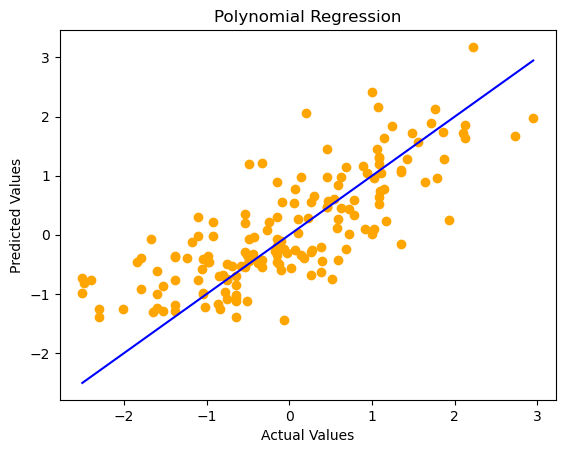

In [47]:
import matplotlib.pyplot as plt

# Plot the data and the predicted curve
plt.scatter(y_test, y_pred_pr, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Support Vector Regression

In [68]:
#Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [70]:
# Predict on test data
y_pred_svr = svr_reg.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [71]:
# Print evaluation metrics
print("Support Vector Regression")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R-squared (R2) Score: {r2_svr}")

Support Vector Regression
Mean Squared Error (MSE): 0.44559010611114036
Root Mean Squared Error (RMSE): 0.6675253599011354
R-squared (R2) Score: 0.644873322415992


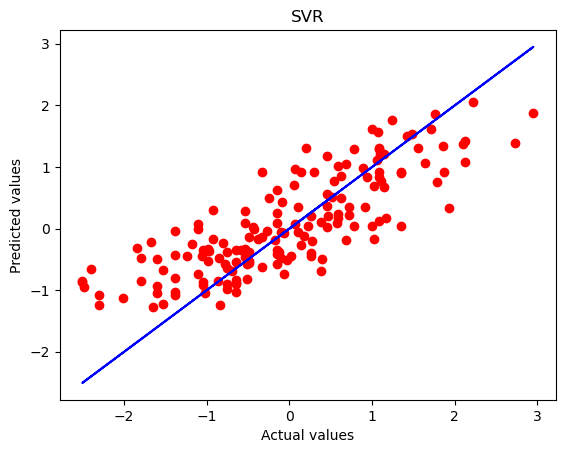

In [80]:
# Visualize the results
plt.scatter(y_test, y_pred_svr, color='red')
plt.plot(y_test, y_test, color='blue')
plt.title('SVR')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()



# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

# Create a lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [49]:
# Evaluate the model with testing data
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

In [50]:
print("Lasso Regression")
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2) Score:", r2_score_lasso)

Lasso Regression
Mean Squared Error (MSE): 0.6806595952204338
Root Mean Squared Error (RMSE): 0.8250209665338414
R-squared (R2) Score: 0.4575274960076924


# Ridge Regression

In [51]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1)

In [52]:
y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.4283659426286056
Root Mean Squared Error (RMSE): 0.654496709410067
R-squared (R2) Score: 0.6586006468512224


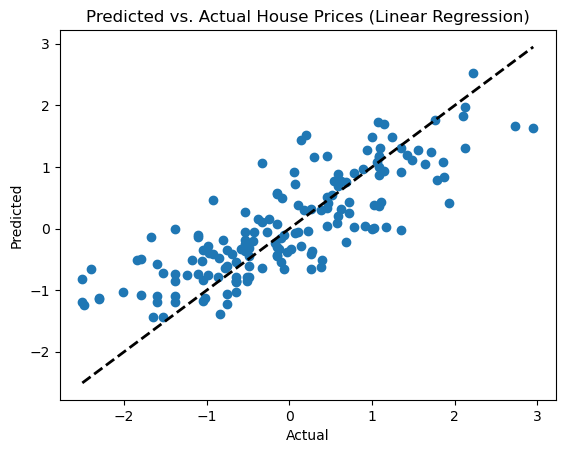

In [60]:

# Plot predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices (Linear Regression)')
plt.show()

In [61]:
print("Linear Regression")
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print('R-squared score:', r2_lr)
print('Root Mean Squared Error:', rmse_lr)

Linear Regression
Mean Absolute Error (MAE): 0.5127477755125702
Mean Squared Error (MSE): 0.4274013432068814
R-squared score: 0.6593694138932602
Root Mean Squared Error: 0.6537593924425724
